In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [117]:
data = pd.read_csv('anaconda3/1.04.+Real-life+example (1).csv')

In [118]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [119]:
#1) CLEAN_DATA

In [120]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [121]:
new_data = data.drop(['Model'], axis=1)
new_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [122]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [123]:
new_data1 = data.dropna(axis = 0)


In [124]:
new_data1.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [125]:
new_data1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [126]:
#2) RELAX ASSUMPTIONS

In [127]:
# Exploring PDF

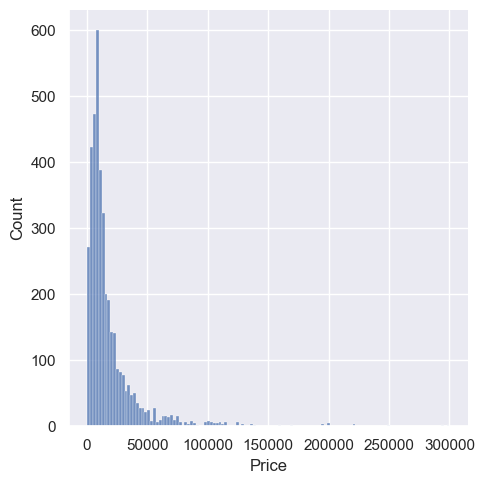

In [128]:
sns.displot(new_data1 ['Price'])

In [129]:
# one way to deal with outliers seemlessly is to remove top 1% of observations.

In [130]:
#dataframe.quantile( the quantile) returns the value at the given quantile ( = np.percentile).

In [131]:
q = new_data1['Price'].quantile (0.99)
data_1 = new_data1[new_data1['Price']<q]

In [132]:
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


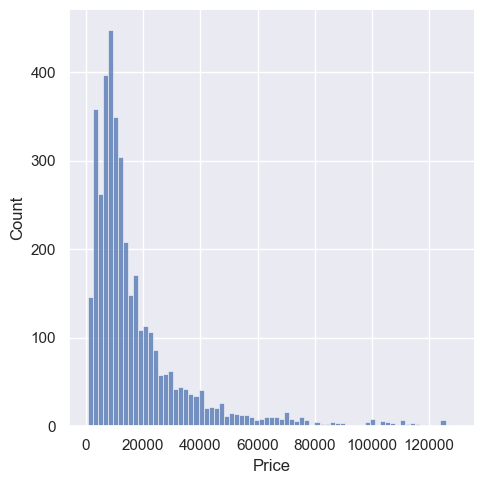

In [133]:
sns.displot(data_1['Price'])

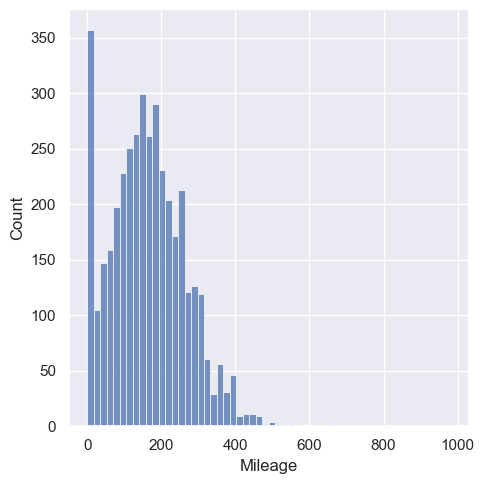

In [134]:
sns.displot(new_data1['Mileage'])

In [135]:
q = new_data1['Mileage'].quantile (0.99)
data_2 = new_data1[new_data1['Mileage']<q]

In [136]:
data_2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,303
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1516,NaN,NaN,1833,3616,NaN,185
mean,NaN,19668.596878,NaN,159.892570,2.768489,NaN,NaN,2006.479669,NaN
std,NaN,25893.860852,NaN,96.633975,4.960538,NaN,NaN,6.616733,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21962.250000,NaN,227.000000,3.000000,NaN,NaN,2012.000000,NaN


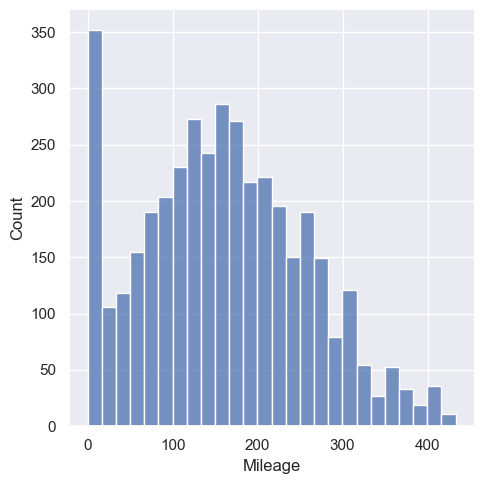

In [137]:
sns.displot(data_2['Mileage'])

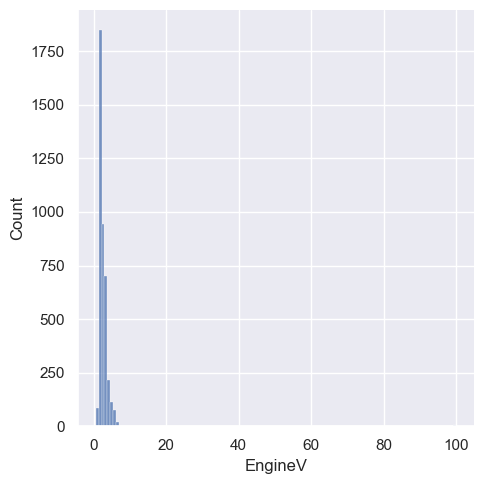

In [138]:
sns.displot(new_data1['EngineV'])

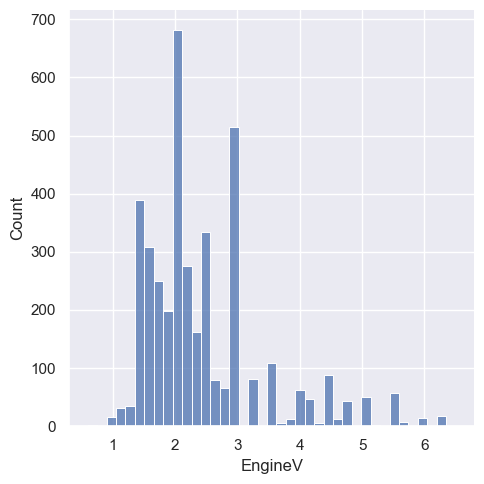

In [139]:
data_3 = data_2[data_2['EngineV']<6.55]
sns.displot(data_3['EngineV'])

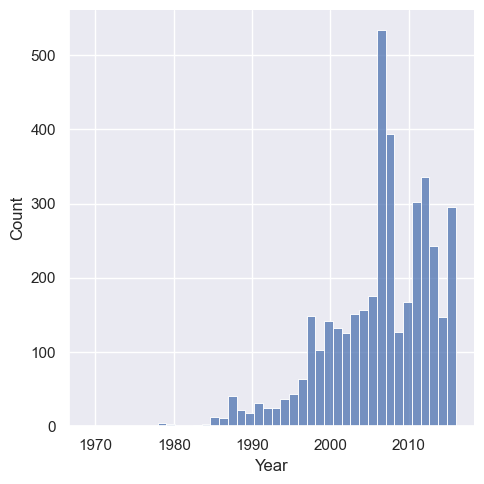

In [140]:
sns.displot(new_data1['Year'])

In [141]:
q = data_3['Year'].quantile(0.01)

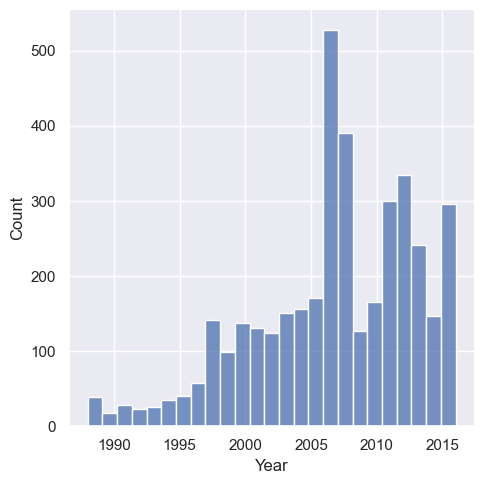

In [142]:
data_4 = data_3[data_3['Year']>q]
sns.displot(data_4['Year'])

In [143]:
data_cleaned = data_4.reset_index(drop = True)

In [144]:
# Checking the OLS Assuptions
# Price , Mileage , Year , EngineV , are those that are likely to be more challenging and cause us more problems.

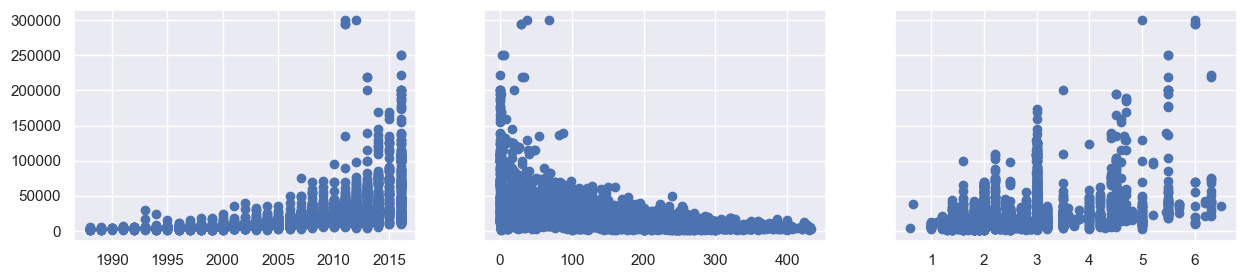

In [145]:
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3) = plt.subplots(
    1, 3,
    sharey=True,
    figsize=(15, 3)
)
ax1.scatter (data_cleaned ['Year'], data_cleaned ['Price'])
ax2.scatter (data_cleaned ['Mileage'], data_cleaned ['Price'])
ax3.scatter (data_cleaned ['EngineV'], data_cleaned ['Price'])
plt.show()

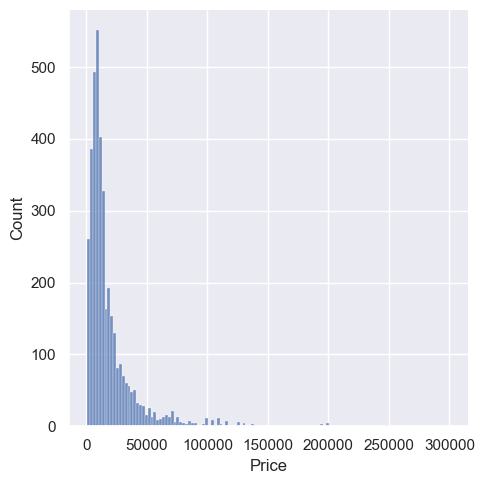

In [146]:
sns.displot (data_cleaned ['Price'])

In [147]:
# 3) Log Transformations are especially useful when facing exponential relationships. 

In [148]:
# np.log (x) returns the natural logarithm of a number or array of numbers.

In [149]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3903,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3904,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3905,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3906,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


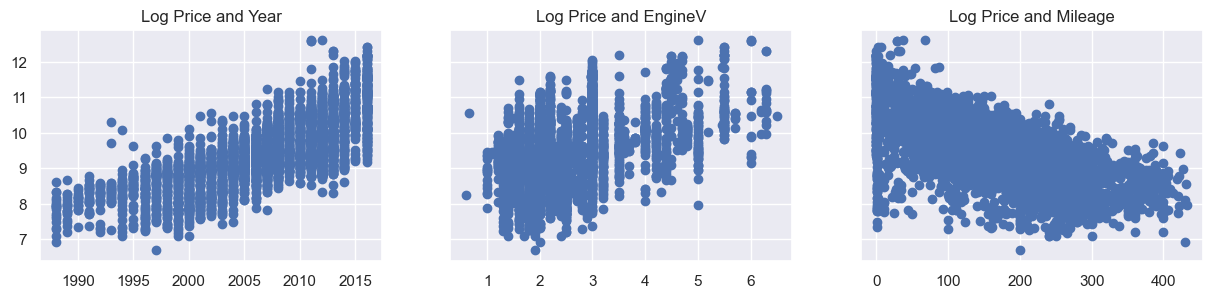

In [150]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [151]:
data_cleaned = data_cleaned.drop (['Price'], axis =1)

In [152]:
#4) MULTICOLINEARITY
# One of the best ways to check Multicolinearity is through VIF (Variance Inflation Factor)

In [153]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [155]:
variables = data_cleaned [['Mileage' , 'Year' , 'EngineV' ]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif ["features"] = variables.columns 

In [156]:
vif

,VIF,features
0,3.703955,Mileage
1,10.302420,Year
2,7.379696,EngineV


In [157]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [158]:
#5) CREATE DUMMY VARIABLES

In [159]:
#pd.get_dummies (df[,drop_first])
#spots all categorical variables and creates dummies automatically.

In [160]:
data_with_dummies = pd.get_dummies(data_no_multicolinearity,drop_first = True)

In [161]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,2.9,8.974618,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,358,5.0,9.495519,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,240,4.2,10.043249,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120,2.0,9.814656,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [162]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_73

In [163]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [164]:
data_preprocessed = data_with_dummies [cols]

In [165]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [166]:
#DECLARE THE INPUTS AND TARGETS

In [167]:
targets = data_preprocessed ['log_price']
inputs = data_preprocessed.drop (['log_price'], axis =1)


In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
scaler = StandardScaler ()

In [170]:
scaler.fit(inputs)

,copy,True
,with_mean,True
,with_std,True


In [171]:
inputs_scaled = scaler.transform(inputs)

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
x_train,x_test,y_train,y_test = train_test_split (inputs_scaled, targets, test_size = 0.2, random_state = 365)

In [174]:
reg = LinearRegression()

In [175]:
reg.fit(x_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [176]:
y_hat = reg.predict(x_train)

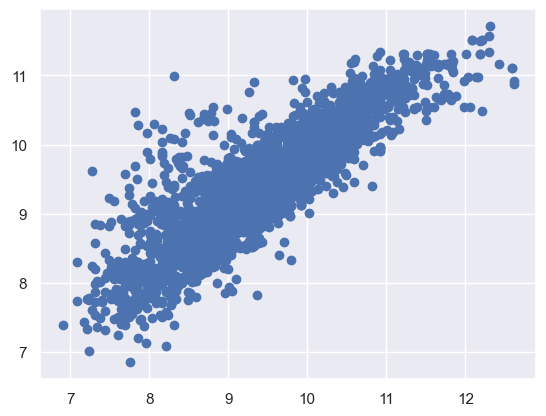

In [177]:
plt.scatter( y_train , y_hat)

In [178]:
y_hat_test = reg.predict(x_test)

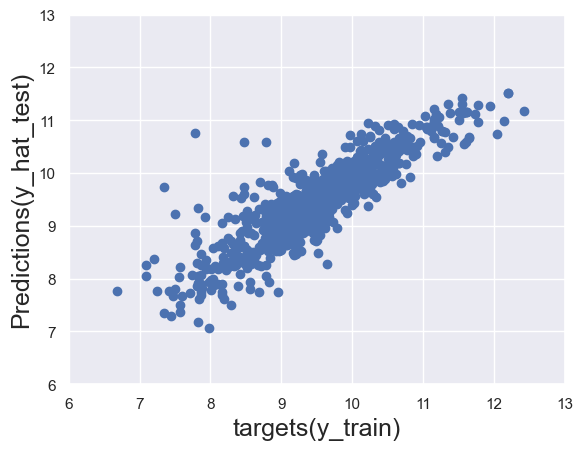

In [179]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('targets(y_train)' , size = 18)
plt.ylabel('Predictions(y_hat_test)' , size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


In [180]:
#Residuals  = Difference b/w the targets and predictions. 

In [181]:
# The residuals are the estimates of this errors.

In [182]:
reg.score ( x_train , y_train)

0.7549627042989158

In [183]:
reg.coef_

array([-0.48498759,  0.25357282,  0.02619335,  0.03490105, -0.12573503,
       -0.16826445, -0.04992847, -0.07437277, -0.13454829, -0.0942901 ,
       -0.18375303, -0.109068  , -0.14951669, -0.12237582, -0.03217284,
       -0.14337864,  0.31108322])

In [187]:
reg_summary = pd.DataFrame(inputs.columns.values,columns = ['features'])
reg_summary

,features
0,Mileage
1,EngineV
2,Brand_BMW
3,Brand_Mercedes-Benz
4,Brand_Mitsubishi
5,Brand_Renault
6,Brand_Toyota
7,Brand_Volkswagen
8,Body_hatch
9,Body_other


In [189]:
reg_summary['weights'] = reg.coef_
reg_summary

,features,weights
0,Mileage,-0.484988
1,EngineV,0.253573
2,Brand_BMW,0.026193
3,Brand_Mercedes-Benz,0.034901
4,Brand_Mitsubishi,-0.125735
5,Brand_Renault,-0.168264
6,Brand_Toyota,-0.049928
7,Brand_Volkswagen,-0.074373
8,Body_hatch,-0.134548
9,Body_other,-0.094290


In [190]:
# Weights Interpretation 
# +ve weights = Shows that as a feature increases in value, so do the log_price and price respectively.
# -ve weights = Shoes that as a feature decreases in value, log_price and price.

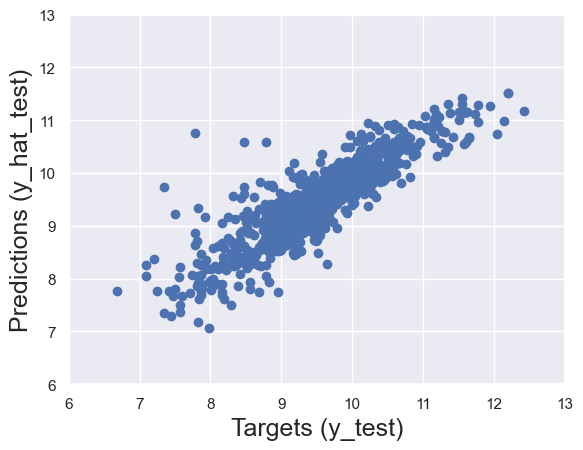

In [192]:
data_cleaned ['Brand'].unique ()
y_hat_test = reg.predict (x_test)
plt.scatter (y_test , y_hat_test)
plt.xlabel ('Targets (y_test)' , size = 18)
plt.ylabel ('Predictions (y_hat_test)' , size = 18)
plt.xlim (6,13)
plt.ylim (6,13)
plt.show()

In [194]:
df_pf = pd.DataFrame (np.exp (y_hat_test) ,columns = ['prediction'])

In [195]:
df_pf.head()

,prediction
0,2454.070118
1,7508.535252
2,13433.062893
3,7558.430174
4,16573.325995


In [196]:
df_pf ['target'] = np.exp(y_test)
df_pf.head()

,prediction,target
0,2454.070118,NaN
1,7508.535252,7900.0
2,13433.062893,NaN
3,7558.430174,NaN
4,16573.325995,NaN


In [199]:
y_test = y_test.reset_index (drop = True)
y_test.head()

0    7.495542
1    9.287301
2    9.609116
3    9.305651
4    9.740910
Name: log_price, dtype: float64

In [200]:
df_pf ['target'] = np.exp (y_test)
df_pf

,prediction,target
0,2454.070118,1800.0
1,7508.535252,10800.0
2,13433.062893,14900.0
3,7558.430174,11000.0
4,16573.325995,16999.0
...,...,...
777,1822.629736,1950.0
778,22004.386156,21335.0
779,7773.434018,13500.0
780,24233.124091,16500.0


In [203]:
df_pf ['Residual'] = df_pf ['target'] - df_pf ['prediction']

In [204]:
df_pf ['difference %'] = np.absolute ( df_pf ['Residual'] / df_pf ['target'] * 100 )
df_pf

,prediction,target,Residual,difference %
0,2454.070118,1800.0,-654.070118,36.337229
1,7508.535252,10800.0,3291.464748,30.476525
2,13433.062893,14900.0,1466.937107,9.845215
3,7558.430174,11000.0,3441.569826,31.286998
4,16573.325995,16999.0,425.674005,2.504112
...,...,...,...,...
777,1822.629736,1950.0,127.370264,6.531808
778,22004.386156,21335.0,-669.386156,3.137502
779,7773.434018,13500.0,5726.565982,42.419007
780,24233.124091,16500.0,-7733.124091,46.867419


In [205]:
df_pf.describe()

,prediction,target,Residual,difference %
count,782.000000,782.000000,782.000000,782.000000
mean,17485.864584,20368.390077,2882.525492,37.116763
std,15693.044018,25783.984157,14900.964466,88.897517
min,1176.650029,800.000000,-44963.889868,0.030509
25%,7558.783412,7500.000000,-2109.331076,10.461211
50%,12164.041665,11999.000000,564.117325,22.988376
75%,21869.358201,22575.000000,3581.425456,38.655591
max,99557.610112,249999.000000,178665.376806,1873.495411


In [206]:
df_pf.sort_values (by = ['difference %'])

,prediction,target,Residual,difference %
270,18993.203632,18999.00,5.796368,0.030509
565,12911.302163,12900.00,-11.302163,0.087614
54,32271.581455,32400.00,128.418545,0.396354
157,1557.385839,1550.00,-7.385839,0.476506
384,17554.920070,17639.47,84.549930,0.479322
...,...,...,...,...
630,10133.281540,1800.00,-8333.281540,462.960086
88,39797.787189,6500.00,-33297.787189,512.273649
444,39357.080334,4800.00,-34557.080334,719.939174
690,16983.214632,1550.00,-15433.214632,995.691267


In [207]:
#--------------------------------------------------------------END--------------------------------------------------------------------------------------